# Part 4: Dynamic Gradient Boosting
### Revisiting the beta approximation
Now that we have found a candidate function, we will use it and see how it fares against Scikit_Learn's implementation.  First, let's review what we concluded in the last notebook.  The two pictures found below illustrate our beta approximation and compares this to the learning rates we calculated.

In [1]:
from sklearn.utils import resample
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.utils import shuffle,resample
from scipy.stats import beta


![Oops Something is wrong](beta_approximation.png "Beta Approximation")

![Oops Something is wrong](comparison.png "Beta Approximation")

## Data Handling
Next, let's load the data and pre-process it in the same fashion we have been throughout the GBT notebooks.

In [2]:
boston = datasets.load_boston()
X, y = shuffle(boston.data, boston.target, random_state=13)
X = X.astype(np.float32)
offset = int(X.shape[0] * .9)
X_train, y_train = X[:offset], y[:offset]
X_test, y_test = X[offset:], y[offset:]
xi = X_train
yi = y_train

## Modifying Scikit-Learn's Package
Instead of using the GBT algorithm we have been building throughout the notebooks, we have slightly modified Scikit-Learn's package to allow us to replace the learning rate with our function.  This new script has been named "dynamic_GBT_regressor" due to the replacement the static learning rate with a dynamic function.  The remainder of the script is identical to Scikit-Learn's, this allows us to call the same functions.  The script is available in the porfolio on GitHub.  

### Model Comparison
The cell below runs the dynamic GBT script with settings that are identical to Scikit-Learn's. Note: The default of this script is to use a learning rate of 0.01. 

In [3]:
import dynamic_GBT_regressor as dgbt
rnd_reg = dgbt.GradientBoostingRegressor(max_depth=2,
                                    n_estimators=5000,
                                    subsample = .9)
rnd_reg.fit(X_train,y_train)
predictions = rnd_reg.predict(X_test)
dynamic_test_score = np.zeros((5000,), dtype=np.float64)

for i, y_pred in enumerate(rnd_reg.staged_predict(X_test)):
    dynamic_test_score[i] = (np.mean((y_test - y_pred)**2))

Now that we have run our model, we need to compare this to Scikit-Learn's to illustrate that they are indeed performing the same operations.  The graph below shows both model's performance on the Test Set.  Clearly, they are identical models.

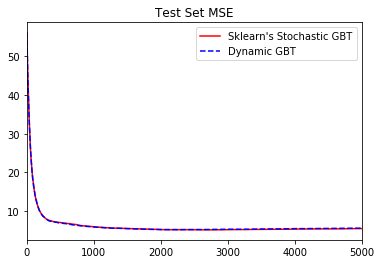

In [4]:
from sklearn.ensemble import GradientBoostingRegressor
n_est = 5000
rnd_reg = GradientBoostingRegressor(max_depth=2,
                                    n_estimators=n_est,
                                    subsample = .9,
                                    learning_rate=.01)
rnd_reg.fit(X_train,y_train)
predictions = rnd_reg.predict(X_test)
test_score = np.zeros((n_est,), dtype=np.float64)

for i, y_pred in enumerate(rnd_reg.staged_predict(X_test)):
    test_score[i] = (np.mean((y_test - y_pred)**2))

    

plt.plot(test_score, label = "Sklearn's Stochastic GBT", color = 'red')
plt.plot(dynamic_test_score, label = 'Dynamic GBT',
         color = 'blue', linestyle = 'dashed')
plt.xlim(0,5000)
plt.legend()
plt.title('Test Set MSE')
plt.show()

## Adding in Our Dynamic Function
Now that we have illustrated that our modified script runs the same as Scikit-Learn's we need to replace the default learning rate of 0.01 with  our dynamic function.  To do this, we will define a new function which uses our beta approximation.  Next, we will monkey patch that function into the dynamic_GBT_regressor script.  Now we can run the model as before.

In [40]:
def function(i):
    scalar = 2
    a = 26
    b = 1
    scale = 80
    loc = -68
    x = scalar*beta.pdf(i, a=a, b=b, scale=scale, loc=loc) + 0.01
    return x

dgbt.function = function

In [ ]:
rnd_reg = dgbt.GradientBoostingRegressor(max_depth=2,
                                    n_estimators=5000,
                                    subsample = .9)
rnd_reg.fit(X_train,y_train)
predictions = rnd_reg.predict(X_test)
dynamic_test_score = np.zeros((n_est,), dtype=np.float64)

for i, y_pred in enumerate(rnd_reg.staged_predict(X_test)):
    dynamic_test_score[i] = (np.mean((y_test - y_pred)**2))

## Model Comparison

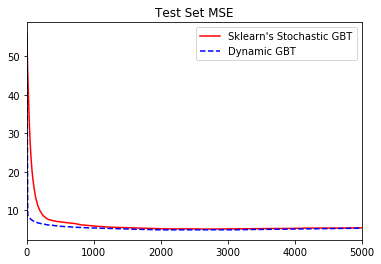

In [41]:
plt.plot(test_score, label = "Sklearn's Stochastic GBT", color = 'red')
plt.plot(dynamic_test_score, label = 'Dynamic GBT',
         color = 'blue', linestyle = 'dashed')
plt.xlim(0,5000)
plt.legend()
plt.title('Test Set MSE')
plt.show()

The graph above shows our dynamic function's performance against that of the static learning rate.  Our function clearly converges much faster and, unlike the MCMC sampled learning rates, it did not overfit the data. Using the dynamic GBT script, one could easily try many different functions and tune the parameters using grid search or Bayesian optimization just like any other parameter in a model. 

# Conclusion
This concludes our look at Gradient Boosted Trees.  In these notebooks we went from a basic algorithm to an overview of our own variation which can bring increased speed and performance.  Thank you for reading!